# AI-MAILs
# 脳画像解析のためのPython入門: Pandas で 表を扱い、Seaborn で可視化する
### Ver.20230811


## 参考にした資料
- [Pandas公式ドキュメント(英語)](https://pandas.pydata.org/docs/index.html)
- [Seaborn公式ドキュメント(英語)](https://seaborn.pydata.org/tutorial/introduction)

## 本日使用したデータ
- COBREデータセット http://fcon_1000.projects.nitrc.org/indi/retro/cobre.html
- 背景情報は配布されているものそのまま
- MRI解析情報は独自で解析したもの

## Pandas と Seaborn
- Pandas: Pythonでデータ分析およびデータ操作をするためのツール "Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."
- Seaborn: Pythonで統計データを簡便に作成するためのツール "Seaborn is a library for making statistical graphics in Python."

## PandasとSeabornを使った一例
- 2つの表 (被験者の背景情報と被験者のMRI解析結果)から、同じIDがあるものを結合
- 背景情報に、性別、年齢、健常者/患者 の情報が、MRI解析結果には灰白質容積の情報があるため、年齢と灰白質容積の散布図を、性別、健常者/被験者の情報を付加して図示したい
- 上記2つが、10行未満で達成できる
- 詳細はこの後で説明するので、まずは実行してみる

--2023-08-11 13:29:53--  https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_phenotypic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5614 (5.5K) [text/plain]
Saving to: ‘COBRE_phenotypic_data.csv’

COBRE_phenotypic_da 100%[===================>]   5.48K  --.-KB/s    in 0s      

2023-08-11 13:29:53 (29.5 MB/s) - ‘COBRE_phenotypic_data.csv’ saved [5614/5614]

--2023-08-11 13:29:53--  https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_t1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3648 (3.6K) [text/

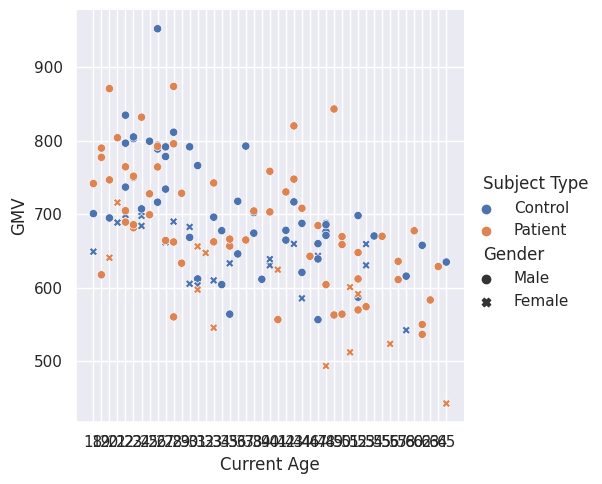

In [1]:
# pandas と seaborn をインポート
import pandas as pd
import seaborn as sns

# seaborn のテーマを設定
sns.set_theme()

# 背景情報の CSV を df_demographics として読み込み
# MRI解析情報の CSV を df_mri として読み込み
![[ -f COBRE_phenotypic_data.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_phenotypic_data.csv
![[ -f COBRE_t1.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_t1.csv
df_demographics = pd.read_csv('/content/COBRE_phenotypic_data.csv')
df_mri = pd.read_csv('/content/COBRE_t1.csv')

# df_demographics と df_mri を 'ID' で結合し、df というデータフレームを生成
df = pd.merge(df_demographics,df_mri,on='ID')

# seaborn で、df を読み込み、x軸に年齢、y軸にGMVを設定し、健常者/患者を色で分け、性別を形で分けて表示
sns.relplot(df,x='Current Age',y='GMV',hue='Subject Type',style='Gender')

## Pandas と Seaborn のインポート
- pandas は pd としてインポートされることが多い
- seaborn は sns としてインポートされることが多い

In [ ]:
# pandas は pd としてインポートされることが多い
import pandas as pd

# seaborn は sns (seaborn name space) としてインポートされることが多い
import seaborn as sns

## Google colaboratory でのデータの読み込み
- Google colaboratoryで作業をする時、通常は、左にある「ファイル」の下にデータをドラッグ & ドロップする
- そうすると、'/content/ファイル名' でアクセスできる
- 今は、データをダウンロードして使用する

In [2]:
# 本日使うデータをダウンロードする
# ファイル名は COBRE_phenotypic_data.csv と COBRE_t1.csv
# ! はPythonからシェルで動かすプログラムを実行したい時につける
# [[ -f COBRE_phenotypic_data.csv ]] は、「COBRE_phenotypic_data.csv というファイルがあるか？」というテスト文
# || は、戻り値が False ならば…　というコマンド
# wget はダウンロードするLinuxのプログラム

![[ -f COBRE_phenotypic_data.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_phenotypic_data.csv
![[ -f COBRE_t1.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_t1.csv

## Pandas の用語: 「データフレーム Data Frame」
- 一般的な表をイメージすればよい
- Pandasでは、ひとつの表を「データフレーム」と呼ぶ
- 行: row; 列: column
- dataframe という名前を略して、 'df' という変数に代入されることが多い

<img src="https://www.nemotos.net/nb/img/pandas_01.png" width=400>

## Pandas へのデータの読み込み
- Pandas は、csvファイルやexcelファイルを読み込むことができる
- Excelファイルはいくつか追加パッケージが必要なことがあるため、csvファイルがおすすめ
- Excel は、`pd.read_excel('excelファイル')` で読み込むことができる
- CSVは、`pd.read_csv('csvファイル')` で読み込むことができる

In [5]:
# COBRE_phenotypic_data.csv を df_demographics として読み込み
df_demographics = pd.read_csv('/content/COBRE_phenotypic_data.csv')

# COBRE_t1.csv を df_mri として読み込み
df_mri = pd.read_csv('/content/COBRE_t1.csv')

## Pandas のデータの表示
- 読み込んだデータフレームを df とすると、最初の5行は df.head() で表示できる
- 表の大きさは、df.shape で確認できる

In [6]:
# df_demographics の最初の5行を確認
df_demographics.head()

,ID,Current Age,Gender,Handedness,Subject Type,Diagnosis
0,40061,18,Male,Right,Control,None
1,40090,18,Female,Right,Control,None
2,40046,18,Male,Left,Patient,295.70 depressed type
3,40002,19,Male,Right,Patient,295.3
4,40117,19,Male,Right,Patient,295.3


In [7]:
# df_demographics の表の大きさを確認
# 148行6列
df_demographics.shape

(148, 6)

In [8]:
# df_mri の最初の5行を確認
df_mri.head()

,ID,GMV,WMV,CSF
0,40000,640.99,431.95,289.0
1,40001,664.49,463.15,207.6
2,40002,617.81,418.59,281.2
3,40003,874.19,573.03,293.5
4,40004,670.24,488.44,477.5


In [11]:
# df_mri の表の大きさを確認
# 142行4列
df_mri.shape

(142, 4)

## データフレームの結合
- データフレームは、pd.merge() 関数を使って結合できる
- 共通するキーを `on='キー'` を使って指定する
- デフォルトは、共通するキーがある行だけが結合される(内部結合)
    - 今の場合、df_demographicsは148行、df_mriは142行なので、142行のみ残る


In [12]:
# df_demographics と df_mri を 'ID' キーを使って連結し、df というデータフレームを生成する
df = pd.merge(df_demographics, df_mri, on='ID')

In [13]:
# df の最初の5行だけ表示する
df.head()

,ID,Current Age,Gender,Handedness,Subject Type,Diagnosis,GMV,WMV,CSF
0,40061,18,Male,Right,Control,None,701.06,441.19,256.4
1,40090,18,Female,Right,Control,None,649.28,353.63,258.3
2,40046,18,Male,Left,Patient,295.70 depressed type,741.98,359.10,271.9
3,40002,19,Male,Right,Patient,295.3,617.81,418.59,281.2
4,40117,19,Male,Right,Patient,295.3,790.25,538.33,248.3


In [14]:
# df の大きさを確認する
df.shape

(142, 9)

In [ ]:
df_selected = df_all[df_all['GMV']>0]

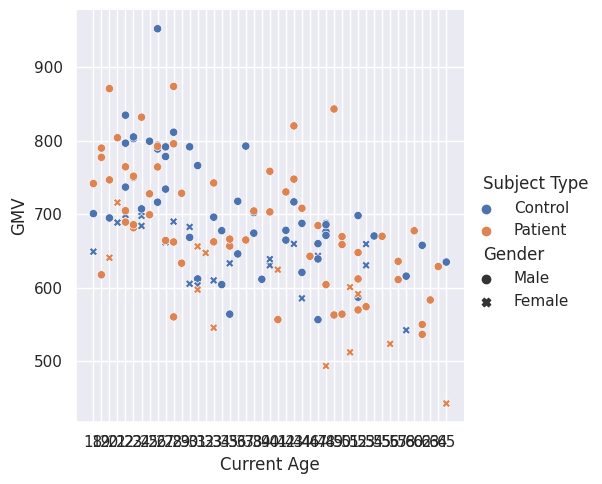

In [ ]:
sns.set_theme()
sns.relplot(df_selected,x='Current Age',y='GMV',hue='Subject Type',style='Gender')

In [ ]:
# pd.read_csv を使用する
# 1列目はIDのようなインデックスの場合、'index_col=0' と指定する
df = pd.read_csv('/content/cobre_142.csv', index_col=0)

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/cobre_142.csv', index_col=0)
sns.set_theme()
sns.relplot(data=df, x="Age", y="GMV", hue="Sex",style="Dx")

In [ ]:
df.head()

In [ ]:
df.loc['sub-40037','CSF']=408.3


In [ ]:
df.loc['sub-40037','ICV'] -= 1000

In [ ]:
df.loc['sub-40037']['ICV']

In [ ]:
sns.relplot(data=df, x="ICV", y="CSF",hue="Sex",style="Dx")

In [ ]:
sns.pairplot(df)

In [ ]:
# df.head() でデータの最初の5行を確認できる
df.head()

In [ ]:
df.shape

In [ ]:
df.index

In [ ]:
# カラム名を使ってデータの一部を抽出できる
# Age のみ抜き出したかったら df['Age']
df['Age']

In [ ]:
# 複数の項目を抜き出したかったら、まず、項目をリストとして作成して、
# df[リスト] とすればよい
# Age と GMV を抜き出したかったら、まず、['Age', 'GMV'] というリストを作る
# そのリストを df[] の中に入れる
# a = ['Age','GMV']
# df[a]

df[['Age','GMV']]

In [ ]:
# データフレームの記述統計は、describe() で求められる
df.describe()

In [ ]:
# データフレームの平均は mean() メソッドで簡単に求められる
df.mean()

In [ ]:
df.median()

In [ ]:
# ある列の平均は、その列だけ取り出して mean() メソッドで簡単に求められる
df['Age'].mean()

In [ ]:
# 複数の列の平均も一度に求められる
df[['Age','GMV']].mean()

In [ ]:
df.mean()

In [ ]:
df.std()

In [ ]:
df.describe()


In [ ]:
# 年齢が40歳より上を取り出したい
#df[df['Age'] >40]
df['Age']>40


In [ ]:
df[df['Age']>40]

In [ ]:
#行を取り出したいときはloc/ilocを使う location based indexer
# 2行目を取り出したい時
df.iloc[1,:]

In [ ]:
# 3行目から5行目を取り出したい
df.iloc[2:5,:]

In [ ]:
# groupby メソッドで、グループ毎の統計量を簡単に見られる。
df.groupby(by='Sex').describe()['Age']

In [ ]:
df.groupby(by=['Sex','Dx']).mean()['ICV']

In [ ]:
df.groupby(by=['Sex','Dx']).size()

In [ ]:
sns.set_theme()
sns.relplot(
    data=df,
    x="Age", y="GMV", hue="Sex",style="Dx")

In [ ]:
sns.relplot(
    data=df,
    x="Age", y="GMV", hue="Dx",style="Sex")

In [ ]:
df['GMV']+df['WMV']

In [ ]:
df['TBV']=df['GMV']+df['WMV']

In [ ]:
df.head()

## Pandasでできることの例
- 表を扱う
- 表の記述統計量
- 表の一部を抽出する
- 複数の列の情報から新しい列を生成する
- PandasのデータフレームはSeabornでのグラフ作成にそのまま使用できる
